Let us look at the difference between accelerated gradient and _usual_ gradient descent. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
def gradient_descent_linLS(matA, rhsB, x0 = None, gamma = None, nbIter = 2000, trueVal = None, verbose = 0): 
    '''Gradient descent algorithm with fixed step size for solving linear least squares'''
    if not gamma: 
        gamma = 1/np.max(np.linalg.eig(matA.transpose().dot(matA))[0])
        print("Step size not specified. Using {}".format(gamma))
    if x0 is None: 
        x0 = matA.transpose().dot(rhsB)
        print("x0 not specified. Starting at {}".format(x0))
    Atb = A.transpose().dot(rhsB)
    AtA = matA.transpose().dot(A)
    
    grad = lambda x: AtA.dot(x) - Atb
    
    for oneiter in range(nbIter): 
        x0 = x0 - gamma*grad(x0)
        curGradNorm = np.linalg.norm(grad(x0))
        if verbose and (oneiter % verbose) == 0: 
            print("Iter: {}. Iterate: {}. Norm gradient: {}".format(oneiter,x0, curGradNorm))
        if curGradNorm < 1e-5: 
            print("\t\t***Problem solved after {} iterations: {}. Norm of the gradient is {}\n\n\n".format(oneiter, x0, curGradNorm))
            break
    return x0

def gradient_descent(f, grad_f, x0, gamma, maxNbIter = 2000, eps_grad = 1e-5, verbose = 0):
    
    nbIter = 0
    gradfxkp1 = grad_f(x0)
    normgk = np.linalg.norm(gradfxkp1)
    all_xs = [x0]
    
    while(normgk >= eps_grad and nbIter <= maxNbIter): 
        xkp1 = x0 - gamma*gradfxkp1
        gradfxkp1 = grad_f(xkp1)
        normgk = np.linalg.norm(gradfxkp1)
        
        x0 = xkp1
        all_xs = np.vstack((all_xs, x0))
        
        nbIter = nbIter + 1
        
        if verbose and (nbIter % verbose) == 0: 
            print("Iter: {}. Iterate: {}. Norm gradient: {}".format(nbIter,x0, normgk))
        
    
    print("Exiting algo after {} iterations. Final result is {} and norm of gradient is {}".format(nbIter, x0, normgk))
    return x0, all_xs


def gradient_descent_quad_exact_lineSearch(f, grad_f, x0, Q, maxNbIter = 2000, eps_grad = 1e-5, verbose = 0):
    
    def exact_gamma(gradf, normfgf): 
        return normfgf**2/(gradf.transpose().dot(Q.dot(gradf)))/2
    
    nbIter = 0
    gradfxkp1 = grad_f(x0)
    normgk = np.linalg.norm(gradfxkp1)
    all_xs = x0
    
    
    while(normgk >= eps_grad and nbIter <= maxNbIter): 
        
        gamma = exact_gamma(gradfxkp1, normgk)
        
        xkp1 = x0 - gamma*gradfxkp1
        gradfxkp1 = grad_f(xkp1)
        normgk = np.linalg.norm(gradfxkp1)
        
        nbIter = nbIter + 1
        x0 = xkp1
        all_xs = np.vstack((all_xs,x0))
        if verbose and (nbIter % verbose) == 0: 
            print("Iter: {}. Iterate: {}. Norm gradient: {}".format(nbIter,x0, normgk))
        
    
    print("Exiting algo after {} iterations. Final result is {} and norm of gradient is {}".format(nbIter, x0, normgk))
    return x0, all_xs


In [5]:

f0 = lambda x: 1*x[0]**2 + 0.01*x[1]**2
g0 = lambda x: np.array([2*x[0], 0.02*x[1]])
#f0 = lambda x: 1*x[0]**2 + 1*x[1]**2
#g0 = lambda x: np.array([2*x[0], 2*x[1]])

x0 = np.array([1,1])
x1 = np.array([0,1])
x2 = np.array([1,0])

gamma = 0.005
verbose = 50
maxNbIter = 1000

gradient_descent(f0,g0,x0, gamma, verbose = verbose)
gradient_descent(f0,g0,x1, gamma, verbose = verbose)
gradient_descent(f0,g0,x2, gamma, verbose = verbose)

gamma = 0.25

gradient_descent(f0,g0,x0, gamma, verbose = verbose)
gradient_descent(f0,g0,x1, gamma, verbose = verbose)
gradient_descent(f0,g0,x2, gamma, verbose = verbose)



Iter: 50. Iterate: [0.60500607 0.99501223]. Norm gradient: 1.2101757660887094
Iter: 100. Iterate: [0.36603234 0.99004934]. Norm gradient: 0.7323324234997828
Iter: 150. Iterate: [0.22145179 0.9851112 ]. Norm gradient: 0.44334157702189086
Iter: 200. Iterate: [0.13397967 0.98019769]. Norm gradient: 0.26867550708458676
Iter: 250. Iterate: [0.08105852 0.97530869]. Norm gradient: 0.16328632210986682
Iter: 300. Iterate: [0.04904089 0.97044408]. Norm gradient: 0.09998370791527454
Iter: 350. Iterate: [0.02967004 0.96560373]. Norm gradient: 0.06240353314721964
Iter: 400. Iterate: [0.01795055 0.96078752]. Norm gradient: 0.04072019785062351
Iter: 450. Iterate: [0.01086019 0.95599533]. Norm gradient: 0.028936932327200127
Iter: 500. Iterate: [0.00657048 0.95122705]. Norm gradient: 0.023121811068038154
Iter: 550. Iterate: [0.00397518 0.94648254]. Norm gradient: 0.02053143867874757
Iter: 600. Iterate: [0.00240501 0.94176171]. Norm gradient: 0.019439709995456578
Iter: 650. Iterate: [0.00145505 0.937064

Iter: 300. Iterate: [4.90909347e-91 2.22292200e-01]. Norm gradient: 0.004445843996814946
Iter: 350. Iterate: [4.36015088e-106 1.73012810e-001]. Norm gradient: 0.00346025620948931
Iter: 400. Iterate: [3.87259191e-121 1.34658043e-001]. Norm gradient: 0.0026931608585202722
Iter: 450. Iterate: [3.43955257e-136 1.04806046e-001]. Norm gradient: 0.002096120914392092
Iter: 500. Iterate: [3.05493636e-151 8.15718614e-002]. Norm gradient: 0.001631437228805569
Iter: 550. Iterate: [2.71332855e-166 6.34884041e-002]. Norm gradient: 0.0012697680812486405
Iter: 600. Iterate: [2.40991987e-181 4.94138221e-002]. Norm gradient: 0.0009882764422007725
Iter: 650. Iterate: [2.14043882e-196 3.84593982e-002]. Norm gradient: 0.000769187964819984
Iter: 700. Iterate: [1.90109157e-211 2.99334326e-002]. Norm gradient: 0.000598668651765466
Iter: 750. Iterate: [1.68850850e-226 2.32975665e-002]. Norm gradient: 0.0004659513291924161
Iter: 800. Iterate: [1.49969681e-241 1.81327885e-002]. Norm gradient: 0.00036265577049328

(array([3.81469727e-06, 0.00000000e+00]),
 array([[1.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 0.00000000e+00],
        [2.50000000e-01, 0.00000000e+00],
        [1.25000000e-01, 0.00000000e+00],
        [6.25000000e-02, 0.00000000e+00],
        [3.12500000e-02, 0.00000000e+00],
        [1.56250000e-02, 0.00000000e+00],
        [7.81250000e-03, 0.00000000e+00],
        [3.90625000e-03, 0.00000000e+00],
        [1.95312500e-03, 0.00000000e+00],
        [9.76562500e-04, 0.00000000e+00],
        [4.88281250e-04, 0.00000000e+00],
        [2.44140625e-04, 0.00000000e+00],
        [1.22070312e-04, 0.00000000e+00],
        [6.10351562e-05, 0.00000000e+00],
        [3.05175781e-05, 0.00000000e+00],
        [1.52587891e-05, 0.00000000e+00],
        [7.62939453e-06, 0.00000000e+00],
        [3.81469727e-06, 0.00000000e+00]]))

In [6]:
c = np.array([1,1,1])

f0 = lambda x, kappa: 1*x[0]**2 + kappa*x[1]**2 + kappa**2*x[2]**2 + x.dot(c)
g0 = lambda x, kappa: np.array([x[0] , kappa*x[1], kappa**2*x[2]])*2 + c
Q = lambda kappa: np.array([[1,0,0], [0, kappa,0], [0,0,kappa**2]])

L_smoothness = lambda kappa: max([kappa**2, 1])

aKappa = 0.1
x0 = np.array([0,0,0])
gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 10)



Iter: 10. Iterate: [-0.20790771 -4.569857   -9.76983739]. Norm gradient: 0.9980275177738888
Iter: 20. Iterate: [ -0.26709548  -4.96488128 -17.75889639]. Norm gradient: 0.7955016645183742
Iter: 30. Iterate: [ -0.31336905  -4.99713534 -24.16320734]. Norm gradient: 0.6374486019394363
Iter: 40. Iterate: [ -0.35044125  -4.99976633 -29.2953929 ]. Norm gradient: 0.510826373611956
Iter: 50. Iterate: [ -0.3801494   -4.99998094 -33.40812817]. Norm gradient: 0.40935650806484275
Iter: 60. Iterate: [ -0.40395636  -4.99999845 -36.70391525]. Norm gradient: 0.3280424824324813
Iter: 70. Iterate: [ -0.42303434  -4.99999987 -39.34503163]. Norm gradient: 0.2628805653922815
Iter: 80. Iterate: [ -0.4383227   -4.99999999 -41.4615202 ]. Norm gradient: 0.21066232382031005
Iter: 90. Iterate: [ -0.45057419  -5.         -43.15759233]. Norm gradient: 0.1688166434485172
Iter: 100. Iterate: [ -0.46039207  -5.         -44.51675898]. Norm gradient: 0.13528313268552394
Iter: 110. Iterate: [ -0.46825973  -5.         -45

(array([ -0.4999971 ,  -5.        , -49.99959853]),
 array([[  0.        ,   0.        ,   0.        ],
        [ -1.35135135,  -1.35135135,  -1.35135135],
        [ -0.09286154,  -1.89070413,  -2.07048839],
        ...,
        [ -0.49999697,  -5.        , -49.99958034],
        [ -0.50000564,  -5.        , -49.99959235],
        [ -0.4999971 ,  -5.        , -49.99959853]]))

Exiting algo after 1 iterations. Final result is [-0.5 -0.5] and norm of gradient is 3.1401849173675503e-16
Iter: 10. Iterate: [-0.43278468 -4.32784684]. Norm gradient: 0.19011362403247384
Iter: 20. Iterate: [-0.4909642  -4.90964202]. Norm gradient: 0.02555709477295002
Iter: 30. Iterate: [-0.49878531 -4.98785312]. Norm gradient: 0.0034356564215617066
Iter: 40. Iterate: [-0.49983671 -4.99836709]. Norm gradient: 0.00046185746665970337
Iter: 50. Iterate: [-0.49997805 -4.99978049]. Norm gradient: 6.2087791483199e-05
Iter: 60. Iterate: [-0.49999705 -4.99997049]. Norm gradient: 8.346501095102379e-06
Exiting algo after 60 iterations. Final result is [-0.49999705 -4.99997049] and norm of gradient is 8.346501095102379e-06
Iter: 10. Iterate: [-0.09063735 -9.06373527]. Norm gradient: 1.157852415429809
Iter: 20. Iterate: [ -0.16484445 -16.4844446 ]. Norm gradient: 0.947963059883995
Iter: 30. Iterate: [ -0.22559967 -22.55996703]. Norm gradient: 0.7761213354389752
Iter: 40. Iterate: [ -0.27534151 -2

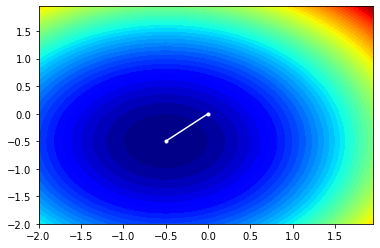

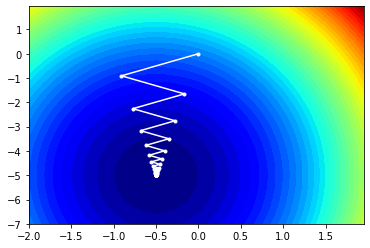

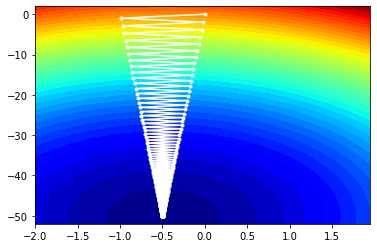

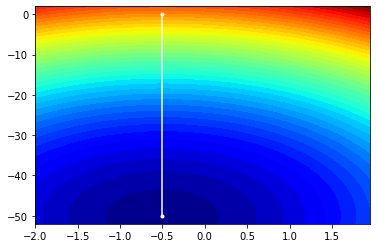

In [7]:
def plot_descent(f,x1range, x2range, x_iterates): 
    plt.figure()
    xaxis = np.arange(x1range[0], x1range[1], 0.05)
    yaxis = np.arange(x2range[0], x2range[1], 0.05)
    x, y = np.meshgrid(xaxis, yaxis)

    results = [[f(np.array([x[i][j], y[i][j]])) for j in range(len(xaxis))] for i in range(len(yaxis))]
    plt.contourf(x, y, results, levels=50, cmap='jet')
    
    plt.plot(x_iterates[:, 0], x_iterates[:, 1], '.-', color='w')
    

    
c = np.array([1,1])

f0 = lambda x, kappa: 1*x[0]**2 + kappa*x[1]**2 + x.dot(c)
g0 = lambda x, kappa: np.array([x[0] , kappa*x[1]])*2 + c
Q = lambda kappa: np.array([[1,0], [0, kappa]])

L_smoothness = lambda kappa: 2*max([1, kappa])

# First test
aKappa = 1
x0 = np.array([0,0])
[xstar, x_iter] = gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-2,2], x_iter)

# Second test
aKappa = 0.1
x0 = np.array([0,0])
[xstar, x_iter] = gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-7,2], x_iter)

# Third test
aKappa = 0.01
x0 = np.array([0,0])
[xstar, x_iter] = gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-52,2], x_iter)


# Fourth test
aKappa = 0.01
x0 = np.array([-0.5,0])
[xstar, x_iter] = gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-52,2], x_iter)


In [8]:
def accelerated_gradient_descent(f, grad_f, x0, gamma, maxNbIter = 2000, eps_grad = 1e-5, verbose = 0):
    
    # Initialize all the x/y/z to the same thing
    y0 = x0
    z0 = x0
    
    nbIter = 0
    gradfykp1 = grad_f(y0)
    normgk = np.linalg.norm(gradfykp1)
    all_xs = [x0]
    
    while(normgk >= eps_grad and nbIter <= maxNbIter): 
        xkp1 = y0 - gamma*gradfykp1
        zkp1 = z0 - gamma/2*(nbIter+1)*gradfykp1
        ykp1 = ((nbIter+1)*xkp1 + 2*zkp1)/(nbIter+3)
        gradfykp1 = grad_f(ykp1)
        normgk = np.linalg.norm(gradfykp1)
        
        # Update the variables 
        x0 = xkp1
        y0 = ykp1
        z0 = zkp1
        # Save the x
        all_xs = np.vstack((all_xs, x0))
        
        nbIter = nbIter + 1
        
        if verbose and (nbIter % verbose) == 0: 
            print("Iter: {}. Iterate: {}. Norm gradient: {}".format(nbIter,x0, normgk))
        
    
    print("Exiting AGD after {} iterations. Final result is {} and norm of gradient is {}".format(nbIter, x0, normgk))
    return x0, all_xs

Iter: 10. Iterate: [-0.5        -4.34388134]. Norm gradient: 0.07703665584941632
Iter: 20. Iterate: [-0.5        -5.15069885]. Norm gradient: 0.01996714981844927
Iter: 30. Iterate: [-0.5        -4.95092589]. Norm gradient: 0.006659247678019509
Iter: 40. Iterate: [-0.5        -5.01855346]. Norm gradient: 0.0024988097688056765
Iter: 50. Iterate: [-0.5        -4.99239178]. Norm gradient: 0.0009990906958404766
Iter: 60. Iterate: [-0.5        -5.00327771]. Norm gradient: 0.00041368830010846125
Iter: 70. Iterate: [-0.5        -4.99854287]. Norm gradient: 0.00017415696159728267
Iter: 80. Iterate: [-0.5        -5.00066081]. Norm gradient: 7.344763003258592e-05
Exiting AGD after 81 iterations. Final result is [-0.5        -5.00033051] and norm of gradient is 2.51992071742535e-06


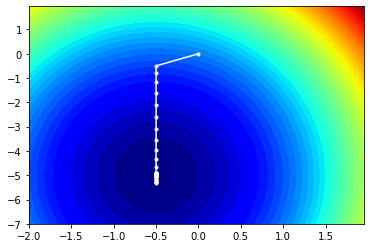

In [9]:
# Third test
aKappa = 0.1
x0 = np.array([0,0])
[xstar, x_iter] = accelerated_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-7,2], x_iter)

Let us now look at hte difference with the usual gradient method without exact line search 

Iter: 10. Iterate: [-0.5       -3.2566078]. Norm gradient: 0.34867844009999993
Iter: 20. Iterate: [-0.5        -4.39211673]. Norm gradient: 0.12157665459056921
Iter: 30. Iterate: [-0.5        -4.78804421]. Norm gradient: 0.04239115827521611
Iter: 40. Iterate: [-0.5        -4.92609559]. Norm gradient: 0.014780882941434648
Iter: 50. Iterate: [-0.5        -4.97423112]. Norm gradient: 0.005153775207320077
Iter: 60. Iterate: [-0.5        -4.99101495]. Norm gradient: 0.0017970102999143034
Iter: 70. Iterate: [-0.5        -4.99686711]. Norm gradient: 0.0006265787482178098
Iter: 80. Iterate: [-0.5        -4.99890763]. Norm gradient: 0.00021847450052836503
Iter: 90. Iterate: [-0.5        -4.99961911]. Norm gradient: 7.61773480458805e-05
Iter: 100. Iterate: [-0.5        -4.99986719]. Norm gradient: 2.6561398887570142e-05
Iter: 110. Iterate: [-0.5        -4.99995369]. Norm gradient: 9.261387131087595e-06
Exiting algo after 110 iterations. Final result is [-0.5        -4.99995369] and norm of gradi

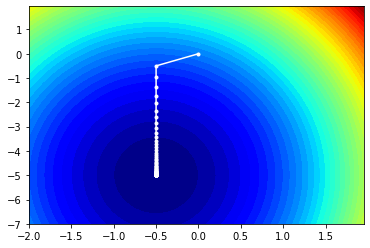

In [10]:
# Third test
aKappa = 0.1
x0 = np.array([0,0])
[xstar, x_iter] = gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 10)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-7,2], x_iter)

Iter: 50. Iterate: [ -0.5        -55.26390731]. Norm gradient: 0.10744629006123496
Iter: 100. Iterate: [ -0.5        -49.58792794]. Norm gradient: 0.005019364408672566
Iter: 150. Iterate: [ -0.5        -49.30853494]. Norm gradient: 0.013681737213128375
Iter: 200. Iterate: [ -0.5        -49.90219875]. Norm gradient: 0.0026087018134058892
Iter: 250. Iterate: [ -0.5        -50.16437978]. Norm gradient: 0.003060538058686779
Iter: 300. Iterate: [ -0.5        -50.08645063]. Norm gradient: 0.0018723194197352022
Iter: 350. Iterate: [ -0.5       -49.9700199]. Norm gradient: 0.00046823969264109255
Iter: 400. Iterate: [ -0.5        -49.95521913]. Norm gradient: 0.0009055734987851727
Iter: 450. Iterate: [ -0.5        -49.99583171]. Norm gradient: 0.00014154940767396873
Exiting AGD after 479 iterations. Final result is [ -0.5        -49.99771152] and norm of gradient is 6.415890012601011e-07
Iter: 50. Iterate: [ -0.5        -19.74969664]. Norm gradient: 0.6050060671375367
Iter: 100. Iterate: [ -0.5

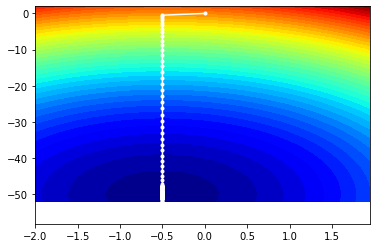

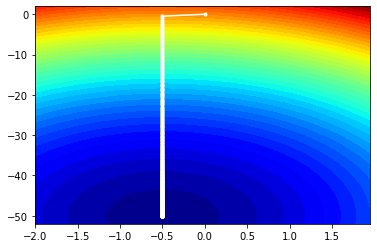

In [11]:
aKappa = 0.01
x0 = np.array([0,0])
[xstar, x_iter] = accelerated_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 50)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-52,2], x_iter)

[xstar, x_iter] = gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 50)

plot_descent(lambda x: f0(x,aKappa), [-2,2], [-52,2], x_iter)


We want to now look at the number of iterations required, as well as the decrease per iterations, as a function of the condition number. 

In [12]:
kappas = [0.001,0.004,0.01,0.04,0.1,0.4,1,4,10,40,100,400,1000]
nbIterations = []

for aKappa in kappas: 
    [xstar, x_iter] = accelerated_gradient_descent(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, 1/L_smoothness(aKappa), verbose = 500)
    nbIterations.append(len(x_iter))

Iter: 500. Iterate: [  -0.5        -493.52780867]. Norm gradient: 0.012416123085346786
Exiting AGD after 521 iterations. Final result is [  -0.5        -499.70477895] and norm of gradient is 3.5721828737234063e-06
Iter: 500. Iterate: [  -0.5        -125.25882846]. Norm gradient: 0.00189050986341055
Exiting AGD after 708 iterations. Final result is [  -0.5        -125.01031642] and norm of gradient is 2.7122384832489743e-06
Exiting AGD after 479 iterations. Final result is [ -0.5        -49.99771152] and norm of gradient is 6.415890012601011e-07
Exiting AGD after 176 iterations. Final result is [ -0.5        -12.49934233] and norm of gradient is 5.430397034156265e-06
Exiting AGD after 81 iterations. Final result is [-0.5        -5.00033051] and norm of gradient is 2.51992071742535e-06
Exiting AGD after 29 iterations. Final result is [-0.5        -1.25001392] and norm of gradient is 3.5497946024865e-06
Exiting AGD after 7 iterations. Final result is [-0.5 -0.5] and norm of gradient is 7.

Text(0, 0.5, 'Number of iterations')

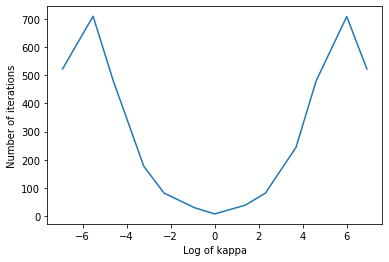

In [13]:
plt.plot(np.log(kappas), nbIterations)
plt.xlabel('Log of kappa')
plt.ylabel('Number of iterations')

Iter: 500. Iterate: [  -0.47809244  -10.         -187.73124151]. Norm gradient: 0.07538452000095151
Iter: 1000. Iterate: [  -0.49865754  -10.         -199.24818791]. Norm gradient: 0.004619456299259458
Iter: 1500. Iterate: [  -0.49991774  -10.         -199.95393002]. Norm gradient: 0.0002830737199152092
Iter: 2000. Iterate: [  -0.49999496  -10.         -199.9971769 ]. Norm gradient: 1.734635543981211e-05
Exiting algo after 2001 iterations. Final result is [  -0.50000981  -10.         -199.99719769] and norm of gradient is 2.4107085448066925e-05


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


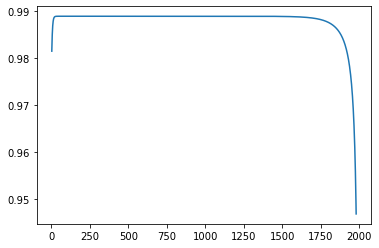

In [19]:
c = np.array([1,1,1])

f0 = lambda x, kappa: 1*x[0]**2 + kappa*x[1]**2 + kappa**2*x[2]**2 + x.dot(c)
g0 = lambda x, kappa: np.array([x[0] , kappa*x[1], kappa**2*x[2]])*2 + c
Q = lambda kappa: np.array([[1,0,0], [0, kappa,0], [0,0,kappa**2]])

L_smoothness = lambda kappa: max([kappa**2, kappa**(-2)])

aKappa = 0.05
x0 = np.array([0,0,0])
[xstar, x_iter] = gradient_descent_quad_exact_lineSearch(lambda x: f0(x,aKappa),lambda x: g0(x,aKappa),x0, Q(aKappa), verbose = 500)


target_val = f0(xstar,aKappa)

decreases = np.zeros(len(x_iter) - 1)

for i in range(0,len(x_iter)-1): 
    decreases[i-1] = (f0(x_iter[i],aKappa) - target_val)/(f0(x_iter[i-1],aKappa) - target_val)
    
plt.figure()
from_end = 20
plt.plot(range(2,len(x_iter)-from_end), decreases[1:-from_end])

In [20]:
decreases[1:20]

array([0.98146792, 0.98286269, 0.98405625, 0.984977  , 0.985766  ,
       0.98636665, 0.98688235, 0.98727088, 0.98760509, 0.98785494,
       0.98807019, 0.98823021, 0.98836823, 0.98847045, 0.98855868,
       0.98862386, 0.98868015, 0.98872167, 0.98875753])

In [21]:
def cond_number(kappa, dim): 
    '''Assumes a n x n matrix, with 1,kappa, kappa**2 etc ... on the diagonal'''
    if kappa >=1: return kappa**(dim-1) 
    return kappa**(1-dim)

q_number = cond_number(aKappa,3)
magic_number = ((q_number-1)/(q_number+1))**2
print("Upper bound is {}".format(magic_number))

Upper bound is 0.9900498131230526
